In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn import preprocessing
from datetime import datetime
from scipy import stats
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

sns.set()
sns.set(color_codes=True)
#sns.set_color_codes()

pd.options.display.max_rows = 15
pd.options.display.float_format = '{:,.3f}'.format

In [35]:
# 1- read data file
# 1- read processed file
file_dir = '../data/processed-data/'
factored_data_file = 'factored_dataset.csv'

data = pd.read_csv(file_dir + factored_data_file)

## Linear Regression Model

In [36]:
targets = data['ltcy']
inputs = data.drop(['ltcy'], axis=1)


x_train, x_test, y_train, y_test = \
        train_test_split(inputs, targets, test_size=0.2, random_state=365)


In [37]:
# regression model
pline = LinearRegression()

y_hat = pline.fit(x_train, y_train)

In [38]:
y_hat = pline.predict(x_train)

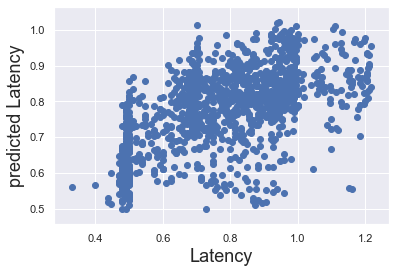

In [39]:
plt.scatter(y_train, y_hat)
plt.xlabel('Latency', size=18)
plt.ylabel("predicted Latency", size=18)
#plt.xlim(-2,3)
#plt.ylim(-3,1)
plt.show()

Text(0.5, 1.0, 'Residual PDF')

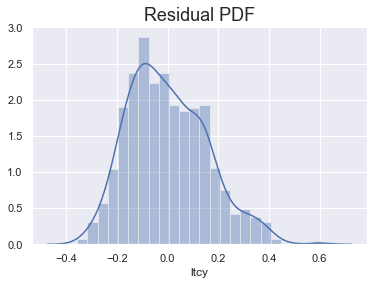

In [40]:
sns.distplot(y_train - y_hat)
plt.title('Residual PDF', size=18)

In [41]:
# R-Squared
pline.score(x_train, y_train)

0.34494574509478576

In [42]:
pline.intercept_

0.7755863098772062

In [43]:
pline.coef_

array([-0.04111155,  0.03276615,  0.02455569, -0.00263492])

### Testing

In [44]:
y_hat_test = pline.predict(x_test)

<function matplotlib.pyplot.show(*args, **kw)>

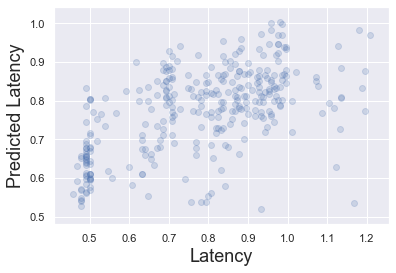

In [45]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Latency', size=18)
plt.ylabel('Predicted Latency', size=18)
plt.show

In [46]:
perf = pd.DataFrame(np.exp(y_hat_test), columns=['prediction'])
y_test = y_test.reset_index(drop=True)
perf['target'] = np.exp(y_test)
perf.head()

,prediction,target
0,2.243,1.999
1,2.304,2.014
2,1.965,1.882
3,2.375,2.705
4,2.564,2.071


In [47]:
perf['residual'] = perf['prediction'] - perf['target']
perf['difference%'] = np.absolute(perf['residual'] * 100 / perf['target'])
perf

,prediction,target,residual,difference%
0,2.243,1.999,0.244,12.192
1,2.304,2.014,0.291,14.433
2,1.965,1.882,0.083,4.383
3,2.375,2.705,-0.329,12.178
4,2.564,2.071,0.493,23.816
...,...,...,...,...
312,2.635,3.348,-0.713,21.292
313,2.330,2.514,-0.184,7.307
314,2.544,2.705,-0.161,5.936
315,2.202,2.664,-0.462,17.341


In [48]:
perf.describe()

,prediction,target,residual,difference%
count,317.000,317.000,317.000,317.000
mean,2.183,2.219,-0.036,12.148
std,0.236,0.410,0.343,8.655
min,1.682,1.581,-1.504,0.010
25%,1.999,1.912,-0.246,5.184
50%,2.218,2.239,0.012,10.641
75%,2.342,2.528,0.200,17.567
max,2.728,3.348,0.668,46.842


In [49]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
perf.sort_values(by = ['difference%'])

,prediction,target,residual,difference%
308,2.40,2.40,-0.00,0.01
166,2.41,2.40,0.00,0.03
40,1.97,1.97,0.00,0.21
200,2.45,2.46,-0.01,0.31
170,2.16,2.17,-0.01,0.34
238,2.04,2.03,0.01,0.45
233,2.64,2.65,-0.01,0.47
81,2.27,2.25,0.01,0.56
253,2.20,2.18,0.01,0.57
88,2.54,2.53,0.01,0.58
